## Hierarchical and DP_GP clustering after RUVSeq

#### Hierarchical Clustering

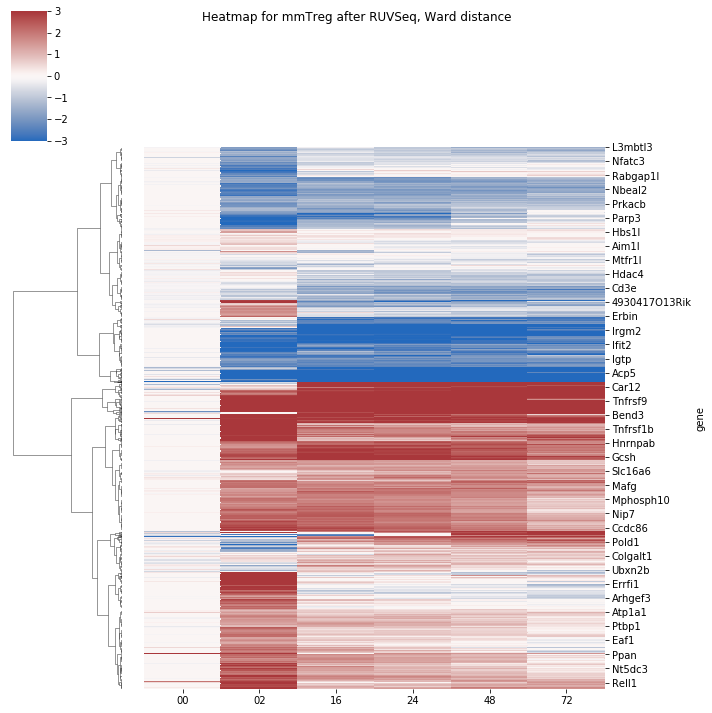

In [11]:
import scipy.cluster.hierarchy as sch
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#sns.set_context("talk")
#sns.set_style("whitegrid")
#sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

df = pd.read_csv("/data/reddylab/Revathy/collabs/Keith/Treg/data/rna_seq/ruvseq/mmTreg_Th0.logFC.txt", sep="\t")
df = df.fillna(0)
df = df.head(1000)
   
df = df.set_index('gene')
cluster = sns.clustermap(df, method = 'ward', cmap='vlag', vmin=-3, vmax=3, col_cluster=False).fig.suptitle('Heatmap for mmTreg after RUVSeq, Ward distance')
plt.show()
#plt.savefig('/data/reddylab/Revathy/collabs/rna-seq_Siklenka/results/rna_seq/clustering/Heatmap for %s, %s distance.pdf' % (factor,method))
        

### DP_GP clustering

Extracting list of genes of sample 5 from the entire list of genes for the dp_gp 

In [8]:
import numpy as np
import pandas as pd

all_genes = pd.read_csv("/data/reddylab/Revathy/collabs/Keith/Treg/data/rna_seq/ruvseq/mmTreg_Th0.logFC.txt", sep="\t")

Treg_sample5 = pd.read_csv('/data/reddylab/Revathy/collabs/Keith/Treg/data/rna_seq/dp_gp/Treg_random_samples/Treg_random_sample_5.txt', sep='\t')
Treg_sample5_gene_list = Treg_sample5.gene.tolist()
final_gene_list = Treg_sample5_gene_list + ['Ctla', 'Stat3', 'Stat5', 'Il10', 'Eomes', 'Runx1', 'Il21ra', 'Il7r', 'Foxp3']

all_gene_with_gene_from_list = all_genes[all_genes.gene.isin(final_gene_list)]


numcols = all_gene_with_gene_from_list.dtypes == np.float64
I = np.sum((all_gene_with_gene_from_list.loc[:,numcols]) != 0,axis = 1) != 0
all_gene_with_gene_from_list_nonzero = all_gene_with_gene_from_list[I]
all_gene_with_gene_from_list_nonzero.columns = [u'gene','00','02','16','24','48','72']
all_gene_with_gene_from_list_nonzero.to_csv('/data/reddylab/Revathy/collabs/Keith/Treg/data/rna_seq/dp_gp/Treg_random_samples_after_ruvseq.txt', sep='\t', index=False)


In [9]:
%%bash
mkdir -p /data/reddylab/Revathy/collabs/Keith/Treg/data/rna_seq/dp_gp/results/ruvseq
source /data/reddylab/software/miniconda2/bin/activate alex
sbatch -p all \
    --mem=32G \
    -o /data/reddylab/Revathy/collabs/Keith/Treg/logs/Treg_sample5_after_ruvseq.out \
    <<'EOF'
#!/bin/sh
module load gcc
outfile="/data/reddylab/Revathy/collabs/Keith/Treg/data/rna_seq/dp_gp/results/ruvseq/Treg_random_samples_after_ruvseq.alpha_0.05.log2fc_DP_GP"
infile="/data/reddylab/Revathy/collabs/Keith/Treg/data/rna_seq/dp_gp/Treg_random_samples_after_ruvseq.txt"
DP_GP_cluster.py \
--alpha 0.05 \
--true_times \
-i ${infile} \
-o ${outfile} \
-p png \
--plot \
EOF

Submitted batch job 26708844


### Correlation between replicates of Treg and Th0

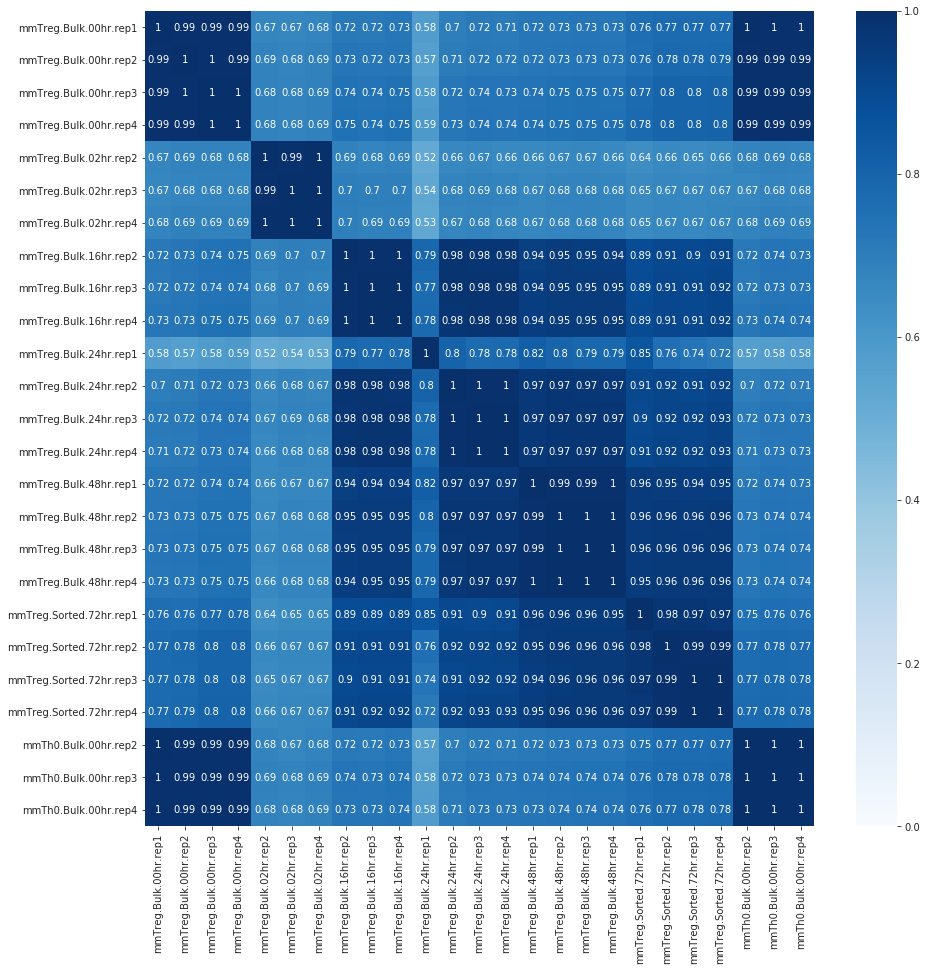

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set_context("talk")
sns.set_style("whitegrid")
plt.rcParams['pdf.fonttype'] = 3
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
%matplotlib inline

treg_th0 = pd.read_csv('/data/reddylab/Revathy/collabs/Keith/Treg/data/rna_seq/counts/Treg_Th0.counts.txt', sep='\t')
treg_th0 = treg_th0.drop(columns=['Unnamed: 0','Geneid'])
correlations = treg_th0.corr()

fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(correlations, annot=True, cmap='Blues', ax=ax, vmin=0, vmax=1)
plt.savefig('/data/reddylab/Revathy/collabs/Keith/Treg/data/rna_seq/correlation_plot_between_replicates.pdf')
plt.show()